In [1]:
import numpy as np
import pylab as pl
import pandas as pd

In [3]:
df = pd.read_csv('udemy_courses.xls')


# **1. ANÁLISIS EXPLORATORIO DE DATOS**

# 1.1 DESCRIPCIÓN DEL DATASET

In [7]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [8]:
df.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [12]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# 1.2 LIMPIEZA DE VALORES NULOS Y/O DUPLICADOS

In [15]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isna().sum())

print("\nFilas con valores nulos:")
print(df[df.isna().any(axis=1)])

# Verificar duplicados
print("\nNúmero de duplicados basados en todas las columnas:")
print(df.duplicated().sum())

print("\nFilas con duplicados en 'course_id':")
print(df[df.duplicated(subset='course_id', keep=False)])

print("\nFilas con duplicados en 'course_id' y 'course_title':")
print(df[df.duplicated(subset=['course_id', 'course_title'], keep=False)])

# Eliminar duplicados y verificar
df_clean = df.drop_duplicates(keep='first')
print("\nNúmero de duplicados después de limpiar:")
print(df_clean.duplicated(subset='course_id', keep=False).sum())


Valores nulos por columna:
course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Filas con valores nulos:
Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject]
Index: []

Número de duplicados basados en todas las columnas:
6

Filas con duplicados en 'course_id':
      course_id                                       course_title  \
453      837322  Essentials of money value: Get a financial Life !   
454     1157298  Introduction to Forex Trading Business For Beg...   
463     1084454                  CFA Level 2- Quantitative Methods   
778     1035638                 Understanding Financial Statements   
787      8

# 1.3 ANÁLISIS DE VARIABLES CATEGÓRICAS

In [16]:
# Ver los valores únicos en columnas categóricas
print("\nValores únicos en 'level':")
print(df_clean['level'].value_counts())

print("\nValores únicos en 'subject':")
print(df_clean['subject'].value_counts())



Valores únicos en 'level':
level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

Valores únicos en 'subject':
subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64


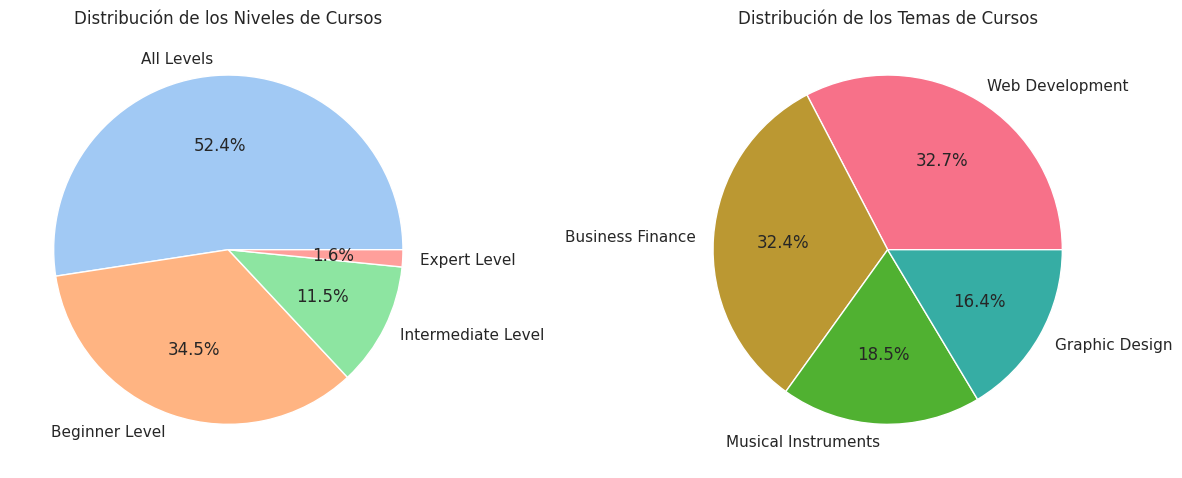

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Crear una figura con dos subgráficos en una sola fila
plt.figure(figsize=(12, 6))

# Primer gráfico de pastel para la variable 'level'
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
level_counts = df_clean['level'].value_counts()
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de los Niveles de Cursos')

# Segundo gráfico de pastel para la variable 'subject'
plt.subplot(1, 2, 2)  # (nrows, ncols, index)
subject_counts = df_clean['subject'].value_counts()
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Distribución de los Temas de Cursos')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


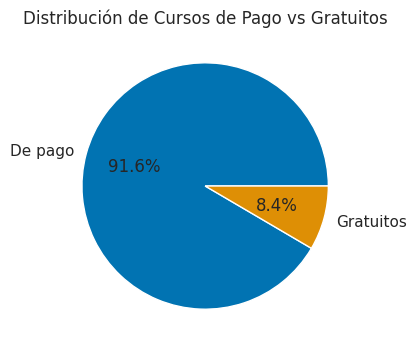

In [24]:
sns.set(style="whitegrid")

# Graficar la distribución de la variable 'is_paid' usando un gráfico de pastel
is_paid_counts = df_clean['is_paid'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(is_paid_counts, labels=is_paid_counts.index.map({True: 'De pago', False: 'Gratuitos'}), autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.title('Distribución de Cursos de Pago vs Gratuitos')
plt.show()

# 1.4 ANÁLISIS DE VARIABLES NUMÉRICAS

Diferentes distribuciones de precios, nº de suscriptores, nº de reseñas, etc

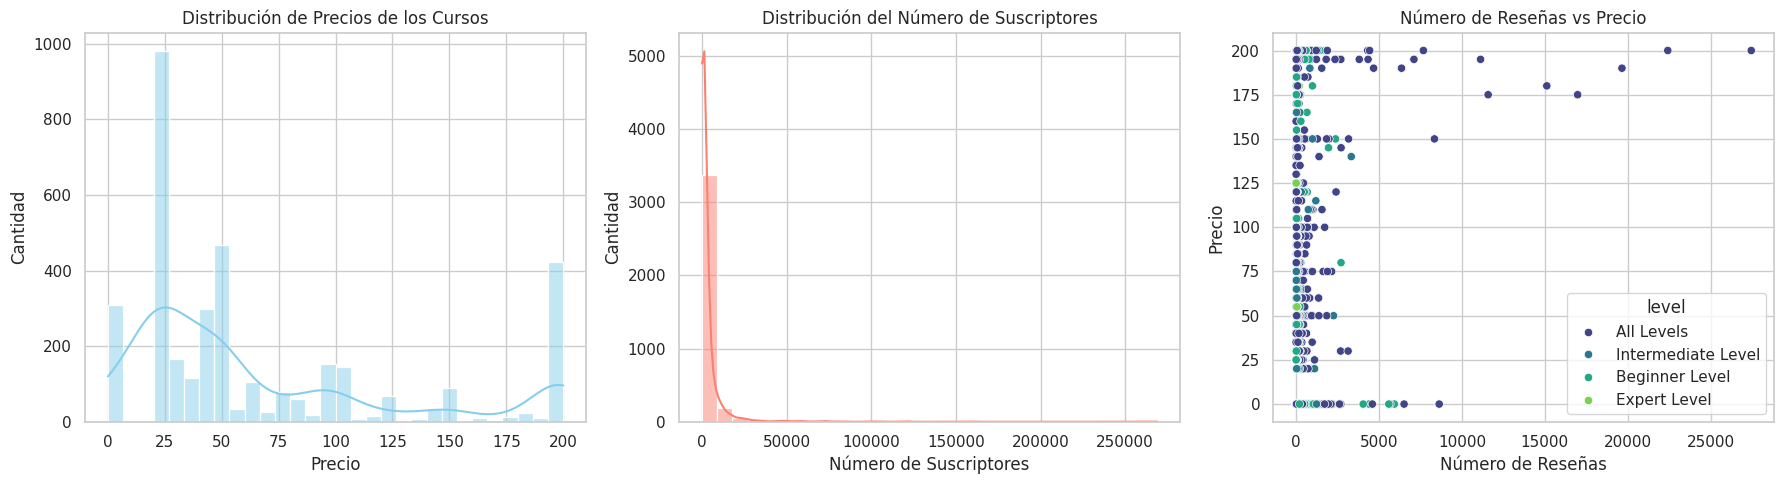

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Crear una figura con tres subgráficos en una sola fila
plt.figure(figsize=(18, 5))

# Histograma de precios
plt.subplot(1, 3, 1)
sns.histplot(df_clean['price'], bins=30, kde=True, color='skyblue')  # Cambia el color aquí
plt.title('Distribución de Precios de los Cursos')
plt.xlabel('Precio')
plt.ylabel('Cantidad')

# Distribución del número de suscriptores
plt.subplot(1, 3, 2)
sns.histplot(df_clean['num_subscribers'], bins=30, kde=True, color='salmon')  # Cambia el color aquí
plt.title('Distribución del Número de Suscriptores')
plt.xlabel('Número de Suscriptores')
plt.ylabel('Cantidad')

# Comparación entre 'num_reviews' y 'price'
plt.subplot(1, 3, 3)
sns.scatterplot(x='num_reviews', y='price', data=df_clean, hue='level', palette='viridis')  # Cambia la paleta aquí
plt.title('Número de Reseñas vs Precio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



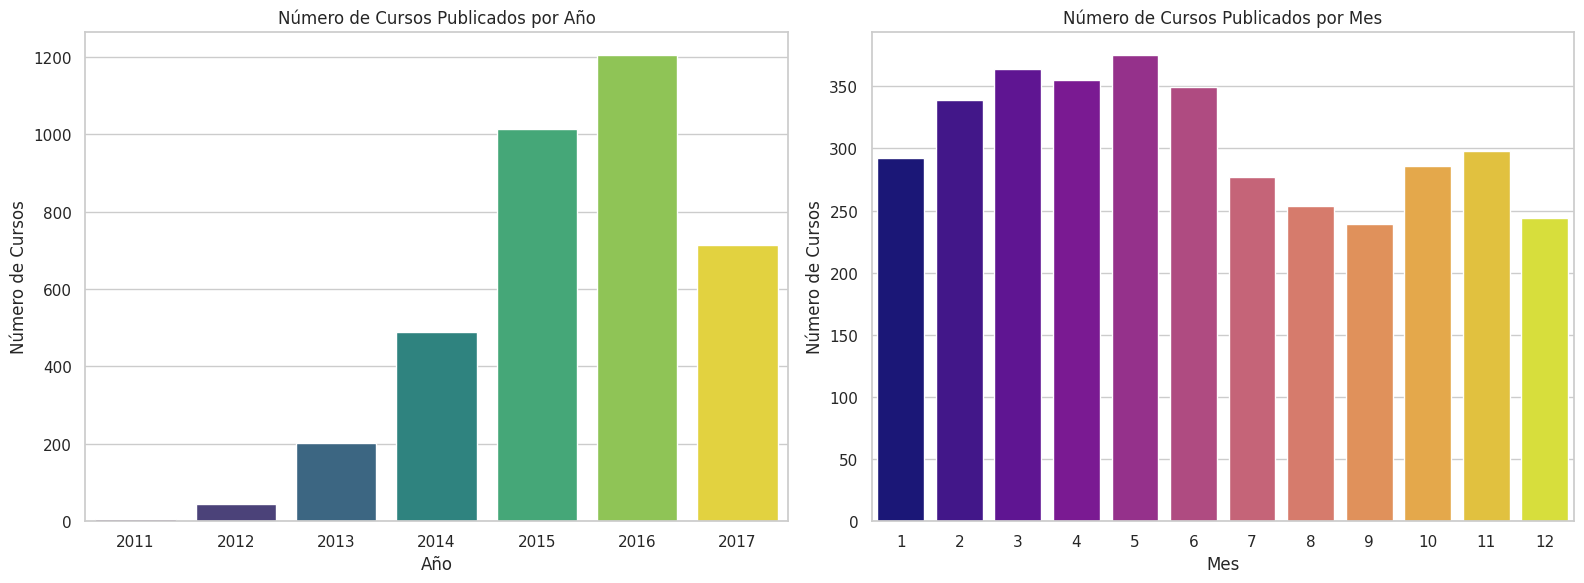

In [34]:
sns.set(style="whitegrid")

# Crear una copia del DataFrame para evitar el SettingWithCopyWarning
df_clean_copy = df_clean.copy()

# Asegúrate de que la columna 'published_timestamp' sea de tipo datetime
df_clean_copy['published_timestamp'] = pd.to_datetime(df_clean_copy['published_timestamp'])

# Extraer año y mes de la fecha de publicación
df_clean_copy['year'] = df_clean_copy['published_timestamp'].dt.year
df_clean_copy['month'] = df_clean_copy['published_timestamp'].dt.month

# Crear una figura con dos subgráficas en una fila
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Contar cursos por año
sns.countplot(x='year', data=df_clean_copy, hue='year', palette='viridis', ax=axs[0], legend=False)
axs[0].set_title('Número de Cursos Publicados por Año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Cursos')

# Contar cursos por mes
sns.countplot(x='month', data=df_clean_copy, hue='month', palette='plasma', ax=axs[1], legend=False)
axs[1].set_title('Número de Cursos Publicados por Mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Número de Cursos')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



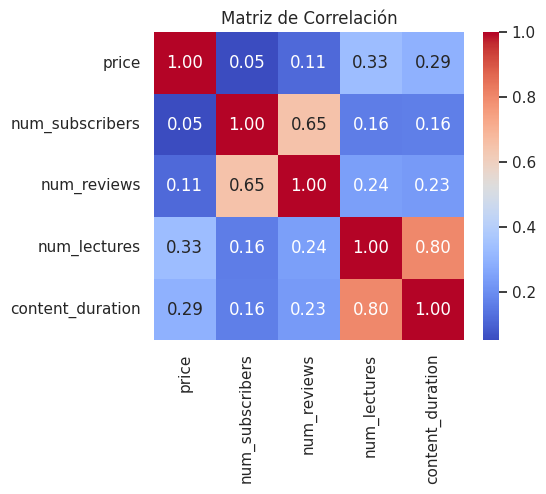

In [35]:
# Calcular la matriz de correlación
correlation_matrix = df_clean[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [40]:
print("Valores de la matriz de correlación:")
print(correlation_matrix)

Valores de la matriz de correlación:
                     price  num_subscribers  num_reviews  num_lectures  \
price             1.000000         0.050436     0.113568      0.329944   
num_subscribers   0.050436         1.000000     0.651070      0.158351   
num_reviews       0.113568         0.651070     1.000000      0.243019   
num_lectures      0.329944         0.158351     0.243019      1.000000   
content_duration  0.293200         0.162118     0.228852      0.801624   

                  content_duration  
price                     0.293200  
num_subscribers           0.162118  
num_reviews               0.228852  
num_lectures              0.801624  
content_duration          1.000000  


- Precio y nº de suscriptores: No hay una relación significativa.
- Nº de suscriptores y nº de reseñas:Hay una relación fuerte, indicando que cursos populares con muchos suscriptores también tienen más reseñas. Lo cual es bastante lógico
- Nº de lecciones y duración del contenido: tienen fuerte correlación, lo cual es lógico

- Habria que tener más datos puesto que deberiamos esperar que el nº de suscriptores si se viera afectado por el precio d elos cursos

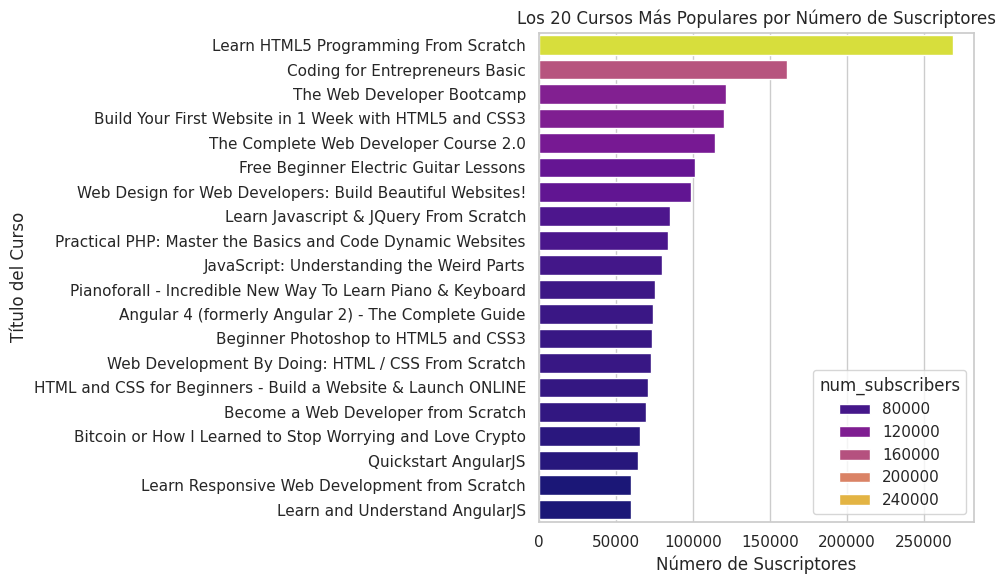

In [47]:
# Top 20 cursos más populares por número de suscriptores
top_cursos = df_clean.sort_values(by='num_subscribers', ascending=False)[:20]

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras, usando 'hue' con una constante para evitar el FutureWarning
sns.barplot(y=top_cursos['course_title'], x=top_cursos['num_subscribers'], palette='plasma', hue=top_cursos['num_subscribers'])

# Configurar los ejes y el título
plt.xlabel('Número de Suscriptores')
plt.ylabel('Título del Curso')
plt.title('Los 20 Cursos Más Populares por Número de Suscriptores')

# Ajustar el espaciado para que los nombres de los cursos sean legibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Nº Cursos por Tema en el Top 20:
subject
Web Development        17
Musical Instruments     2
Business Finance        1
Name: count, dtype: int64


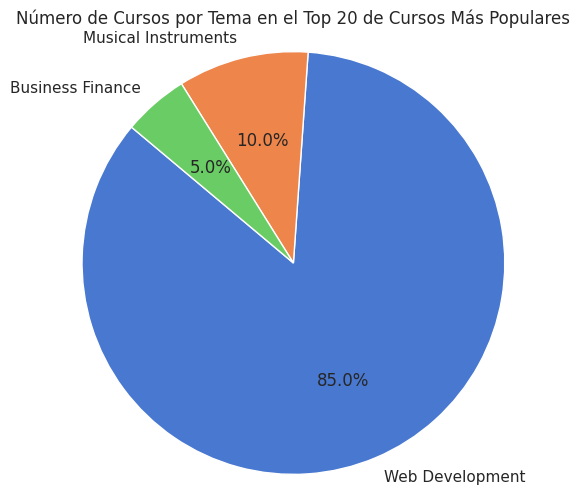

In [52]:
# Contar la cantidad de cursos por tema en el top 20
conteo_por_subject = top_cursos['subject'].value_counts()

# Mostrar los resultados
print("Nº Cursos por Tema en el Top 20:")
print(conteo_por_subject)

# Crear el gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo_por_subject, labels=conteo_por_subject.index, autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=140)
plt.title('Número de Cursos por Tema en el Top 20 de Cursos Más Populares')
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto
plt.show()


# **2. ANÁLISIS PREDICTIVO**

# 2.1 ANÁLISIS DE PRECIOS

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una copia del DataFrame para evitar modificaciones inesperadas
df_clean_copy = df_clean.copy()

# Codificar la variable categórica 'level'
df_clean_copy = pd.get_dummies(df_clean_copy, columns=['level'], drop_first=True)

# Seleccionar características y variable objetivo
X = df_clean_copy[['price', 'num_reviews', 'num_lectures', 'content_duration'] + [col for col in df_clean_copy.columns if col.startswith('level_')]]
y = df_clean_copy['num_subscribers']

# Verificar si hay valores nulos en las columnas seleccionadas
print(X.isnull().sum())
print(y.isnull().sum())

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

price                       0
num_reviews                 0
num_lectures                0
content_duration            0
level_Beginner Level        0
level_Expert Level          0
level_Intermediate Level    0
dtype: int64
0
Error cuadrático medio (MSE): 32613931.126801312
Coeficiente de determinación (R^2): 0.5371686236442208
Coeficientes: [   -3.99536328     6.96250186    -5.1532265     70.25525463
   452.22465897 -1474.35440432 -1037.25334874]
Intercepto: 2345.103822440993


El modelo predictivo muestra que el precio tiene un impacto negativo en el número de suscriptores, con una reducción esperada a medida que aumenta el precio. La variabilidad en el número de suscriptores está moderadamente explicada por el modelo, con un R2R2 de 0.537. Los factores como el número de reseñas y la duración del contenido tienen una influencia positiva, mientras que el número de lecciones y los niveles básicos y avanzados tienden a disminuir los suscriptores. Considera ajustar precios y enfocarte en aumentar reseñas y duración del contenido para mejorar la atracción de suscriptores.

Según el sistema, la mayor cantidad de suscriptores se podría esperar de precio 0€. Se intentó realizar un modelo predictivo usando el precio, nivel y cantidad de suscriptores sin exito. Faltan datos representativos

# **3. ANÁLISIS Y RECOMENDACIÓN**

## SISTEMA DE RECOMENDACIÓN BASADO EN EL TÍTULO

Para recomendar cursos similares, primero tokenizamos los títulos de los cursos, dividiéndolos en palabras clave. Luego, convertimos estos títulos en vectores numéricos utilizando TF-IDF, que nos da una matriz TF-IDF que refleja la importancia de cada palabra en cada título. Calculamos la similitud entre todos los títulos usando la similitud de coseno, creando una matriz de similitud que muestra cuán similares son los cursos entre sí. Finalmente, usamos esta matriz para recomendar cursos que son similares al que está buscando el usuario.

## 3.1 PREPARACIÓN DE DATOS

In [103]:
# Eliminar duplicados basados en el título del curso
df_clean = df_clean.drop_duplicates(subset='course_title')

# Verificar el número de cursos únicos nuevamente
print(f"Número de cursos únicos después de eliminar duplicados: {df_clean['course_title'].nunique()}")


Número de cursos únicos después de eliminar duplicados: 3663


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Crear la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_clean['course_title'])

# Verificar la forma de la matriz TF-IDF
print("Tamaño de la matriz TF-IDF:", tfidf_matrix.shape)

# Calcular la matriz de similitud de coseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Verificar la forma de la matriz de similitud
print("Tamaño de la matriz de similitud:", cosine_sim.shape)


Tamaño de la matriz TF-IDF: (3663, 3570)
Tamaño de la matriz de similitud: (3663, 3663)


In [110]:
# Asegúrate de que el DataFrame tenga índices en el rango de la matriz TF-IDF
df_clean = df_clean.iloc[:tfidf_matrix.shape[0]]


In [111]:
# Reindexar df_clean para que coincida con el rango de la matriz TF-IDF
df_clean = df_clean.reset_index(drop=True)


In [112]:
# Filtrar df_clean para eliminar cursos que están fuera del rango
valid_indices = range(tfidf_matrix.shape[0])
df_clean = df_clean[df_clean.index.isin(valid_indices)]


In [113]:
# Recalcular la matriz TF-IDF y la matriz de similitud
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_clean['course_title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [114]:
# Reindexar el DataFrame después de eliminar duplicados
df_clean = df_clean.reset_index(drop=True)

# Verificar la longitud del DataFrame
print(f"Número de cursos después de reindexar: {len(df_clean)}")


Número de cursos después de reindexar: 3663


In [115]:
# Encuentra los cursos en el DataFrame que no están en el rango de cosine_sim
out_of_range_courses_verified = df_clean[df_clean.index >= tfidf_matrix.shape[0]]
print("Cursos fuera del rango de cosine_sim:")
print(out_of_range_courses_verified[['course_title']])


Cursos fuera del rango de cosine_sim:
Empty DataFrame
Columns: [course_title]
Index: []


Es necesario que todos los datos estén revisados para que no haya problemas con la matriz

## 3.2 FUNCIÓN

**BASADO EN 1 ATRIBUTO: TÍTULO**

In [184]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Verificar si el curso está en el DataFrame
    if course_title not in df_clean['course_title'].values:
        raise ValueError(f"El curso '{course_title}' no se encuentra en el DataFrame.")

    # Obtener el índice del curso
    idx_list = df_clean[df_clean['course_title'] == course_title].index
    if len(idx_list) == 0:
        raise ValueError(f"No se encontró el curso '{course_title}' en el DataFrame.")
    
    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Generar las recomendaciones
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo
    course_indices = [i[0] for i in sim_scores]
    recommended_courses = df_clean[['course_title', 'url', 'price', 'num_subscribers']].iloc[course_indices]

    return recommended_courses.reset_index(drop=True)


In [101]:
from IPython.display import display

# Probar con un curso específico
recommended_courses_df = recommend_courses("The Web Developer Bootcamp", cosine_sim=cosine_sim)
display(recommended_courses_df)


,course_title,url,price,num_subscribers
0,The Complete Web Developer Bootcamp - Beginner...,https://www.udemy.com/job-ready-web-developer/,190,14103
1,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832
2,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120,69186
3,The Complete front end web developer Bootcamp ...,https://www.udemy.com/complete-front-end-web-d...,200,900
4,Learn How To Become a Web Developer From Scratch,https://www.udemy.com/learn-how-to-become-a-fr...,200,7062
5,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512
6,The Advanced Web Developer Course,https://www.udemy.com/the-advanced-web-develop...,100,6890
7,The Ultimate Web Developer How To Guide,https://www.udemy.com/learn-web-development-co...,200,24861
8,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,195,1839
9,Become a Certified Web Developer,https://www.udemy.com/become-a-certified-web-d...,100,26673


## 3.3 PRUEBAS Y AÑADIDOS

**BASADO EN 3 ATRIBUTOS**

Se puede ir refinando el sistema de recomendación, utilizando no solo el título sino el nivel o la temática

In [117]:
# Crear una nueva columna que combine el título del curso, el nivel y la materia
df_clean['combined_info'] = df_clean['course_title'] + ' ' + df_clean['level'] + ' ' + df_clean['subject']


In [118]:
# Vectorizar la información combinada
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_clean['combined_info'])

# Calcular la similitud de coseno entre todos los cursos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [119]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Retornar los cursos recomendados
    recommended_courses = df_clean[['course_title', 'url', 'price', 'num_subscribers']].iloc[course_indices]
    return recommended_courses.reset_index(drop=True)


In [120]:
from IPython.display import display

# Probar con un curso específico
recommended_courses_df = recommend_courses("The Web Developer Bootcamp", cosine_sim=cosine_sim)
display(recommended_courses_df)


,course_title,url,price,num_subscribers
0,The Complete Web Developer Bootcamp - Beginner...,https://www.udemy.com/job-ready-web-developer/,190,14103
1,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832
2,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120,69186
3,The Complete front end web developer Bootcamp ...,https://www.udemy.com/complete-front-end-web-d...,200,900
4,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512
5,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,195,1839
6,Learn How To Become a Web Developer From Scratch,https://www.udemy.com/learn-how-to-become-a-fr...,200,7062
7,Bootstrap Bootcamp - Responsive web developmen...,https://www.udemy.com/bootstrap-bootcamp-with-...,100,253
8,The Ultimate Web Developer How To Guide,https://www.udemy.com/learn-web-development-co...,200,24861
9,HTML/CSS Bootcamp,https://www.udemy.com/html-css-code-bootcamp/,40,194


**CAMBIANDO EL PESO DE LOS ATRIBUTOS**

In [121]:
df_clean['weighted_info'] = df_clean['course_title'] * 2 + ' ' + df_clean['subject'] + ' ' + df_clean['level']


In [122]:
# Vectorizar la información combinada
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_clean['weighted_info'])

# Calcular la similitud de coseno entre todos los cursos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [123]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Retornar los cursos recomendados
    recommended_courses = df_clean[['course_title', 'url', 'price', 'num_subscribers']].iloc[course_indices]
    return recommended_courses.reset_index(drop=True)


In [124]:
from IPython.display import display

# Probar con un curso específico
recommended_courses_df = recommend_courses("The Web Developer Bootcamp", cosine_sim=cosine_sim)
display(recommended_courses_df)

,course_title,url,price,num_subscribers
0,The Complete Web Developer Bootcamp - Beginner...,https://www.udemy.com/job-ready-web-developer/,190,14103
1,Learn How To Become a Web Developer From Scratch,https://www.udemy.com/learn-how-to-become-a-fr...,200,7062
2,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120,69186
3,The Advanced Web Developer Course,https://www.udemy.com/the-advanced-web-develop...,100,6890
4,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512
5,The Ultimate Web Developer How To Guide,https://www.udemy.com/learn-web-development-co...,200,24861
6,The Complete front end web developer Bootcamp ...,https://www.udemy.com/complete-front-end-web-d...,200,900
7,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832
8,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,195,1839
9,The Complete Web Developer Masterclass: Beginn...,https://www.udemy.com/webdevelopercourse/,195,37141


**REGLAS DE PRECIOS**

In [139]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Filtrar los cursos recomendados para aquellos cuyo precio sea menor a 150
    filtered_courses = df_clean.iloc[course_indices]
    filtered_courses = filtered_courses[filtered_courses['price'].astype(float) < 150]

    # Seleccionar columnas relevantes
    recommended_courses = filtered_courses[['course_title', 'url', 'price', 'num_subscribers']]
    return recommended_courses.reset_index(drop=True)




In [140]:
from IPython.display import display

# Probar con un curso específico
recommended_courses_df = recommend_courses("The Web Developer Bootcamp", cosine_sim=cosine_sim)
display(recommended_courses_df)

,course_title,url,price,num_subscribers
0,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120,69186
1,The Advanced Web Developer Course,https://www.udemy.com/the-advanced-web-develop...,100,6890


**PARA GRANDES VOLUMENES DE TEXTO**

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Ajustar parámetros del vectorizador
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df_clean['combined_info'])

# Reducir dimensionalidad con SVD Este método es más adecuado si deseas manejar grandes volúmenes de texto y características complejas de manera más eficiente
svd = TruncatedSVD(n_components=100)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Calcular similitud de coseno en la matriz reducida
cosine_sim_reduced = cosine_similarity(reduced_matrix, reduced_matrix)

def recommend_courses(course_title, cosine_sim=cosine_sim_reduced):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Retornar los cursos recomendados
    recommended_courses = df_clean[['course_title', 'url', 'price', 'num_subscribers']].iloc[course_indices]
    return recommended_courses.reset_index(drop=True)



In [144]:
# Ejemplo de uso
from IPython.display import display

recommended_courses_df = recommend_courses("The Web Developer Bootcamp")
display(recommended_courses_df)

,course_title,url,price,num_subscribers
0,Become A Full Stack Web Developer in 14 Days,https://www.udemy.com/become-a-full-stack-web-...,195,467
1,Become a Certified Web Developer,https://www.udemy.com/become-a-certified-web-d...,100,26673
2,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832
3,Code & Grow Rich: Earn More As An Entrepreneu...,https://www.udemy.com/code-grow-rich-earn-more...,200,7211
4,Twitter Integration customize Tweets with deve...,https://www.udemy.com/twitter-integration-cust...,115,2039
5,The Complete Web Developer Bootcamp - Beginner...,https://www.udemy.com/job-ready-web-developer/,190,14103
6,Become a Rockstar Web Developer - Learn By Coding,https://www.udemy.com/become-rockstar-php-deve...,200,2076
7,Become a Kick-Ass Web Developer: From Newbie t...,https://www.udemy.com/become-a-web-developer/,200,6751
8,The Complete front end web developer Bootcamp ...,https://www.udemy.com/complete-front-end-web-d...,200,900
9,Become a Professional Web Developer | Version 3.0,https://www.udemy.com/web-development-tutorials/,200,6851


# **4.EXTRAS**

## 4.1 NUBE DE PALABRAS

Una nube de palabras es una visualización que muestra las palabras más frecuentes en un texto o conjunto de textos. Las palabras que aparecen con más frecuencia se representan en un tamaño más grande, mientras que las menos frecuentes se muestran en un tamaño más pequeño. Esto te da una idea rápida de qué palabras son más comunes y, por lo tanto, podrían ser más importantes en el texto.

In [93]:
!pip install nltk wordcloud matplotlib


Defaulting to user installation because normal site-packages is not writeable


### 4.1.1 PREPARACIÓN Y PROCESAMIENTO DEL TEXTO

In [147]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Inicializar el stemmer y las stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /home/somberkers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/somberkers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
def preprocess_text(text):
    # Tokenizar el texto
    words = word_tokenize(text.lower())
    # Eliminar stopwords y hacer stemming
    filtered_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)


In [149]:
df_clean['processed_info'] = df_clean['combined_info'].apply(preprocess_text)


Podemos elegir texto ya previamente procesado para afinar más


In [150]:
text = ' '.join(df_clean['processed_info'])


### 4.1.2 CREACIÓN DE LA NUBE

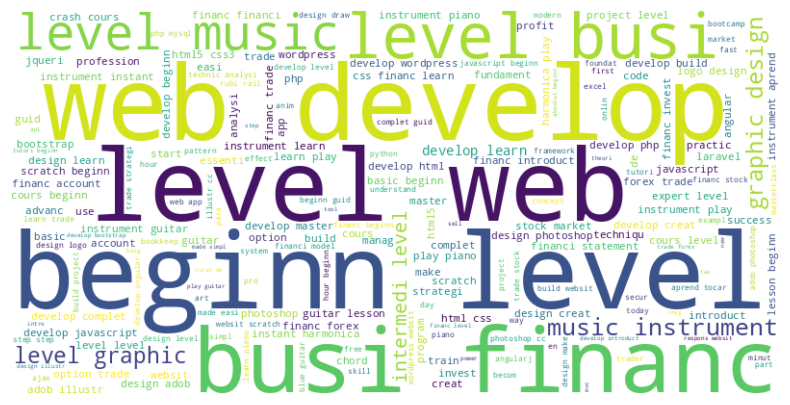

In [151]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [152]:
# Extraer palabras clave de la nube de palabras
# Para simplificar, vamos a usar las palabras más frecuentes
# Puedes ajustar esto según tus necesidades
wordcloud_words = wordcloud.words_
top_words = list(wordcloud_words.keys())[:10]  # Obtener las 10 palabras más frecuentes
print("Palabras clave:", top_words)

Palabras clave: ['beginn level', 'web develop', 'level web', 'busi financ', 'level busi', 'level music', 'music instrument', 'graphic design', 'level graphic', 'intermedi level']


**INCLUSIÓN DE LA NUBE**

In [164]:
def filter_courses_by_keywords(df_clean, keywords):
    # Crear una expresión regular para buscar cursos que contengan alguna de las palabras clave
    keyword_pattern = '|'.join(keywords)
    # Incluir cursos cuyo título contenga alguna de las palabras clave
    filtered_courses = df_clean[df_clean['course_title'].str.contains(keyword_pattern, case=False, na=False)]
    return filtered_courses


In [165]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Filtrar los cursos recomendados para aquellos que contengan palabras clave
    top_words = list(wordcloud_words.keys())[:10]  # Obtener las palabras clave
    filtered_courses = df_clean.iloc[course_indices]
    filtered_courses = filter_courses_by_keywords(filtered_courses, top_words)

    # Seleccionar columnas relevantes
    recommended_courses = filtered_courses[['course_title', 'url', 'price', 'num_subscribers']]
    return recommended_courses.reset_index(drop=True)



In [166]:
from IPython.display import display

# Probar la función de recomendación
recommended_courses_df = recommend_courses("The Web Developer Bootcamp")
display(recommended_courses_df)


,course_title,url,price,num_subscribers
0,The Complete Web Developer Bootcamp - Beginner...,https://www.udemy.com/job-ready-web-developer/,190,14103
1,Learn How To Become a Web Developer From Scratch,https://www.udemy.com/learn-how-to-become-a-fr...,200,7062
2,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,120,69186
3,The Advanced Web Developer Course,https://www.udemy.com/the-advanced-web-develop...,100,6890
4,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512
5,The Ultimate Web Developer How To Guide,https://www.udemy.com/learn-web-development-co...,200,24861
6,The Complete front end web developer Bootcamp ...,https://www.udemy.com/complete-front-end-web-d...,200,900
7,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832
8,The Complete Web Developer Masterclass: Beginn...,https://www.udemy.com/webdevelopercourse/,195,37141


**EXCLUSIÓN DE LA NUBE**

In [167]:
def exclude_courses_by_keywords(df_clean, keywords):
    # Crear una expresión regular para buscar cursos que contengan alguna de las palabras clave
    keyword_pattern = '|'.join(keywords)
    # Excluir cursos cuyo título contenga alguna de las palabras clave
    filtered_courses = df_clean[~df_clean['course_title'].str.contains(keyword_pattern, case=False, na=False)]
    return filtered_courses


In [170]:
def recommend_courses(course_title, cosine_sim=cosine_sim):
    # Obtener el índice del curso que coincide con el título dado
    idx_list = df_clean[df_clean['course_title'] == course_title].index.tolist()
    
    if not idx_list:
        raise ValueError(f"No se encontró un curso con el título '{course_title}' en el DataFrame.")

    idx = idx_list[0]

    # Verificar que el índice esté dentro del rango de la matriz de similitud
    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    # Obtener las puntuaciones de similitud para todos los cursos con respecto al curso dado
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo y seleccionar los 10 más similares

    # Obtener los índices de los cursos más similares
    course_indices = [i[0] for i in sim_scores]

    # Filtrar los cursos recomendados para aquellos que NO contengan palabras clave
    top_words = list(wordcloud_words.keys())[:10]  # Obtener las palabras clave
    filtered_courses = df_clean.iloc[course_indices]
    filtered_courses = exclude_courses_by_keywords(filtered_courses, top_words)

    # Seleccionar columnas relevantes
    recommended_courses = filtered_courses[['course_title', 'url', 'price', 'num_subscribers']]
    return recommended_courses.reset_index(drop=True)


In [171]:
from IPython.display import display

# Probar la función de recomendación
recommended_courses_df = recommend_courses("The Web Developer Bootcamp")
display(recommended_courses_df)


,course_title,url,price,num_subscribers
0,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,195,1839


La inclusión o exclusión de la nube de palabras es decisión del usuario en función del valor que esto aporte al sistema

## 4.2 RUTA DE APRENDIZAJE

Una ruta de aprendizaje (o "learning path" en inglés) es un plan estructurado que guía a los estudiantes a través de una serie de cursos, actividades, o recursos para lograr un objetivo educativo específico. En el contexto de educación y formación, las rutas de aprendizaje ayudan a los estudiantes a adquirir habilidades y conocimientos de manera secuencial y organizada.

In [172]:
def generate_learning_path(start_course_title, num_recommendations=5):
    # Generar la ruta de aprendizaje basada en el curso inicial
    learning_path = []
    current_title = start_course_title
    recommended_titles = set()  # Para llevar un registro de cursos ya recomendados

    for _ in range(num_recommendations):
        recommendations = recommend_courses(current_title, cosine_sim)
        
        # Filtrar recomendaciones para evitar cursos repetidos
        recommendations = recommendations[~recommendations['course_title'].isin(recommended_titles)]
        
        if recommendations.empty:
            print("No hay más cursos únicos para recomendar.")
            break
        
        next_course = recommendations.iloc[0]['course_title']
        learning_path.append(next_course)
        recommended_titles.add(next_course)
        current_title = next_course
    
    return learning_path

# Ejemplo de uso
learning_path = generate_learning_path("The Web Developer Bootcamp")
print("Ruta de Aprendizaje Personalizada:")
for course in learning_path:
    print(course)


Ruta de Aprendizaje Personalizada:
The Complete JavaScript Bootcamp
The Complete Guide to JavaScript Development
JavaScript Complete Guide to learning JavaScript
JavaScript for Beginners Welcome to learning JavaScript
Simple Javascript: Learn by Doing, Beginners Welcome!


# Todo se puede ajustar, corregir y afinar en función del dataset y de las necesidades del usuario

## **5. APLICACIÓN**

In [185]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

# Simulación de datos para el ejemplo
# df_clean = pd.read_csv('path_to_your_data.csv')
# cosine_sim = np.random.rand(3663, 3663)  # Esto es solo un ejemplo

def recommend_courses(course_title, cosine_sim, level_filter, price_filter):
    if course_title not in df_clean['course_title'].values:
        raise ValueError(f"No se encontró el curso '{course_title}' en el DataFrame.")

    idx_list = df_clean[df_clean['course_title'] == course_title].index
    if len(idx_list) == 0:
        raise ValueError(f"No se encontró el curso '{course_title}' en el DataFrame.")
    
    idx = idx_list[0]

    if idx >= cosine_sim.shape[0]:
        raise ValueError(f'Índice {idx} está fuera del rango para la matriz de similitud.')

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir el curso mismo
    course_indices = [i[0] for i in sim_scores]
    recommended_courses = df_clean[['course_title', 'url', 'price', 'num_subscribers', 'level', 'is_paid']].iloc[course_indices]

    # Aplicar filtros de nivel
    if level_filter != 'Todos':
        recommended_courses = recommended_courses[recommended_courses['level'] == level_filter]
    
    # Aplicar filtros de precio
    if price_filter == 'Gratis':
        recommended_courses = recommended_courses[recommended_courses['is_paid'] == False]
    elif price_filter == 'De pago':
        recommended_courses = recommended_courses[recommended_courses['is_paid'] == True]

    return recommended_courses.reset_index(drop=True)

def show_recommendations():
    course_title = entry.get()
    level_filter = level_combobox.get()
    price_filter = price_combobox.get()

    if not course_title:
        messagebox.showwarning("Entrada Vacía", "Por favor, ingresa un título de curso.")
        return

    try:
        recommendations = recommend_courses(course_title, cosine_sim, level_filter, price_filter)
        if recommendations.empty:
            messagebox.showinfo("Sin Recomendaciones", "No se encontraron recomendaciones.")
        else:
            # Limpiar el contenido previo
            for widget in results_frame.winfo_children():
                widget.destroy()

            # Mostrar las recomendaciones en un formato de tabla
            for index, row in recommendations.iterrows():
                tk.Label(results_frame, text=f"Título: {row['course_title']}", font=("Helvetica", 12, "bold"), bg="#e3f2fd").pack(anchor=tk.W, pady=2, padx=10, fill=tk.X)
                tk.Label(results_frame, text=f"Enlace: {row['url']}", font=("Helvetica", 10), bg="#e3f2fd").pack(anchor=tk.W, pady=2, padx=10, fill=tk.X)
                tk.Label(results_frame, text=f"Precio: {row['price']}", font=("Helvetica", 10), bg="#e3f2fd").pack(anchor=tk.W, pady=2, padx=10, fill=tk.X)
                tk.Label(results_frame, text=f"Suscriptores: {row['num_subscribers']}", font=("Helvetica", 10), bg="#e3f2fd").pack(anchor=tk.W, pady=2, padx=10, fill=tk.X)
                tk.Label(results_frame, text=f"Nivel: {row['level']}", font=("Helvetica", 10), bg="#e3f2fd").pack(anchor=tk.W, pady=2, padx=10, fill=tk.X)
                tk.Label(results_frame, text="", font=("Helvetica", 10), bg="#e3f2fd").pack()  # Espacio entre cursos
    except Exception as e:
        messagebox.showerror("Error", str(e))

def create_tkinter_app():
    root = tk.Tk()
    root.title("Sistema de Recomendación de Cursos")

    # Configuración de la ventana principal
    root.geometry("600x800")
    root.resizable(False, False)
    root.configure(bg="#bbdefb")

    # Título de la aplicación
    tk.Label(root, text="Sistema de Recomendación de Cursos", font=("Helvetica", 18, "bold"), bg="#bbdefb", fg="#0d47a1").pack(pady=15)

    # Campo de entrada para el título del curso
    tk.Label(root, text="Ingrese el título del curso:", font=("Helvetica", 14), bg="#bbdefb", fg="#0d47a1").pack(pady=5)
    global entry
    entry = tk.Entry(root, width=60, font=("Helvetica", 12))
    entry.pack(pady=5)

    # Filtro de nivel
    tk.Label(root, text="Selecciona el nivel:", font=("Helvetica", 14), bg="#bbdefb", fg="#0d47a1").pack(pady=5)
    global level_combobox
    level_combobox = ttk.Combobox(root, values=['Todos', 'Beginner Level', 'Intermediate Level', 'Advanced Level', 'All Levels'], state='readonly')
    level_combobox.set('Todos')
    level_combobox.pack(pady=5)

    # Filtro de precio
    tk.Label(root, text="Selecciona el tipo de precio:", font=("Helvetica", 14), bg="#bbdefb", fg="#0d47a1").pack(pady=5)
    global price_combobox
    price_combobox = ttk.Combobox(root, values=['Todos', 'Gratis', 'De pago'], state='readonly')
    price_combobox.set('Todos')
    price_combobox.pack(pady=5)

    # Botón para obtener recomendaciones
    recommend_button = tk.Button(root, text="Obtener Recomendaciones", command=show_recommendations, font=("Helvetica", 12, "bold"), bg="#0d47a1", fg="white", relief=tk.RAISED)
    recommend_button.pack(pady=15)

    # Marco para mostrar los resultados
    global results_frame
    results_frame = tk.Frame(root, bg="#e3f2fd", borderwidth=2, relief=tk.SUNKEN)
    results_frame.pack(pady=10, fill=tk.BOTH, expand=True)

    root.mainloop()

# Ejecutar la aplicación Tkinter
create_tkinter_app()
